In [38]:
import os
import numpy as np
import glob
import shutil
import math

import matplotlib.pyplot as plt

In [39]:
#import packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.9.2'

# Data Loading

In [40]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

path = os.path.dirname(zip_file)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
!find $val_dir -type d -print
!find $train_dir -type d -print

/root/.keras/datasets/flower_photos/val
/root/.keras/datasets/flower_photos/val/sunflowers
/root/.keras/datasets/flower_photos/val/daisy
/root/.keras/datasets/flower_photos/val/roses
/root/.keras/datasets/flower_photos/val/dandelion
/root/.keras/datasets/flower_photos/val/tulips
/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/train/sunflowers
/root/.keras/datasets/flower_photos/train/daisy
/root/.keras/datasets/flower_photos/train/roses
/root/.keras/datasets/flower_photos/train/dandelion
/root/.keras/datasets/flower_photos/train/tulips


In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

For convenience, let us set up the path for the training and validation sets

In [41]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Data Augmentation

In [42]:
batch_size = 100
IMG_SHAPE = 150

### TODO: Apply Random Horizontal Flip

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random horizontal flip. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [43]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))


Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### TODO: Apply Random Rotation

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random 45 degree rotation. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [45]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

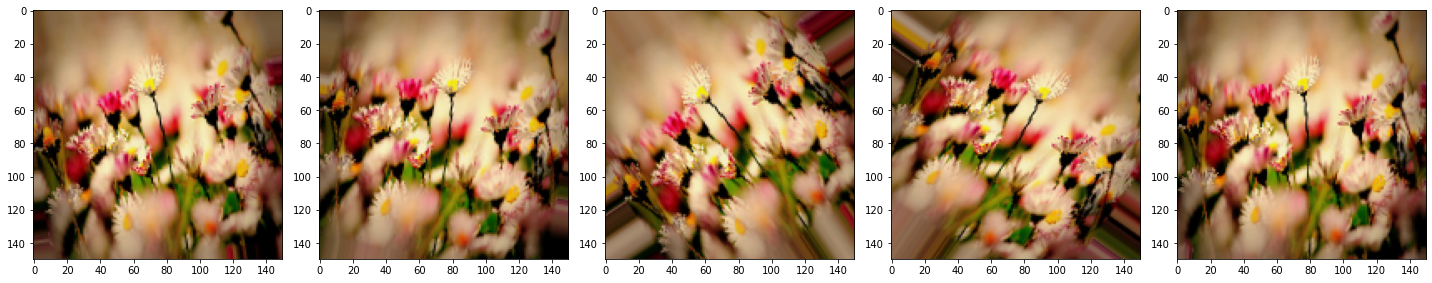

In [47]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### TODO: Apply Random Zoom

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and then applies a random zoom of up to 50%. Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, and to shuffle the images. 

In [48]:
image_gen =ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### TODO: Put It All Together

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

- random 45 degree rotation
- random zoom of up to 50%
- random horizontal flip
- width shift of 0.15
- height shift of 0.15

Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to `sparse`.

In [55]:
image_gen_train = ImageDataGenerator(rescale=1./255, 
                                     horizontal_flip=True,
                                     rotation_range=45, 
                                     zoom_range=0.5,
                                     #fill_mode = 'nearest',
                                     height_shift_range = 0.15,
                                     width_shift_range = 0.15
                                     )


train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               class_mode = 'sparse')


Found 2935 images belonging to 5 classes.


Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset. 

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### TODO: Create a Data Generator for the Validation Set

Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the `.flow_from_directory` method to apply the above transformation to the images in our validation set. Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to `sparse`. Remember that it is not necessary to shuffle the images in the validation set. 

In [56]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size = batch_size,
                                               directory = val_dir,
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               class_mode = 'sparse')

Found 735 images belonging to 5 classes.


# TODO: Create the CNN

In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a `Conv2D` layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a `pool_size` of `(2, 2)`.

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the **softmax** activation function. All other layers should use a **relu** activation function. You should also add Dropout layers with a probability of 20%, where appropriate. 

In [58]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16, (3,3),padding = 'same', input_shape = (150,150,3), activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),

                            tf.keras.layers.Conv2D(32, (3,3),padding = 'same', activation = "relu"),
                            tf.keras.layers.MaxPool2D(2,2),

                            tf.keras.layers.Conv2D(64, (3,3),padding = 'same', activation = "relu"),
                            tf.keras.layers.MaxPool2D(2,2),

                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dropout(0.2),
                             
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dropout(0.2),
                             
                            tf.keras.layers.Dense(2, activation = 'softmax')
                            ])


# TODO: Compile the Model

In the cell below, compile your model using the ADAM optimizer, the sparse cross entropy function as a loss function. We would also like to look at training and validation accuracy on each epoch as we train our network, so make sure you also pass the metrics argument.

In [59]:
from tensorflow.python import metrics
# Compile the model
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

# TODO: Train the Model

In the cell below, train your model using the **fit_generator** function instead of the usual **fit** function. We have to use the `fit_generator` function because we are using the **ImageDataGenerator** class to generate batches of training and validation data for our model. Train the model for 80 epochs and make sure you use the proper parameters in the `fit_generator` function.

In [60]:
epochs = 80

history = model.fit_generator(train_data_gen,
                              epochs = epochs,
                              steps_per_epoch = int(np.ceil(2935/float(batch_size))),
                              validation_data= val_data_gen,
                              validation_steps = int(np.ceil(735/float(batch_size)))
                              )

<ipython-input-60-eee30b56c562>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/80
30/30 [==============================] - 25s 795ms/step - loss: nan - accuracy: 0.1731 - val_loss: nan - val_accuracy: 0.1728
Epoch 2/80
30/30 [==============================] - 24s 819ms/step - loss: nan - accuracy: 0.1724 - val_loss: nan - val_accuracy: 0.1728
Epoch 3/80
30/30 [==============================] - 24s 799ms/step - loss: nan - accuracy: 0.1724 - val_loss: nan - val_accuracy: 0.1728
Epoch 4/80
30/30 [==============================] - 24s 791ms/step - loss: nan - accuracy: 0.1724 - val_loss: nan - val_accuracy: 0.1728
Epoch 5/80
30/30 [==============================] - 24s 805ms/step - loss: nan - accuracy: 0.1724 - val_loss: nan - val_accuracy: 0.1728
Epoch 6/80
30/30 [==============================] - 24s 786ms/step - loss: nan - accuracy: 0.1724 - val_loss: nan - val_accuracy: 0.1728
Epoch 7/80
30/30 [==============================] - 23s 795ms/step - loss: nan - accuracy: 0.1724 - val_loss: nan - val_accuracy: 0.1728
Epoch 8/80
30/30 [=======================

# TODO: Plot Training and Validation Graphs.

In the cell below, plot the training and validation accuracy/loss graphs.

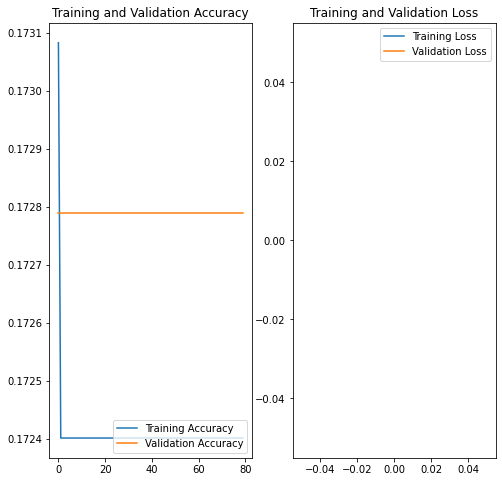

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# TODO: Experiment with Different Parameters

So far you've created a CNN with 3 convolutional layers and followed by a fully connected layer with 512 units. In the cells below create a new CNN with a different architecture. Feel free to experiment by changing as many parameters as you like. For example, you can add more convolutional layers, or more fully connected layers. You can also experiment with different filter sizes in your convolutional layers, different number of units in your fully connected layers, different dropout rates, etc... You can also experiment by performing image augmentation with more image transformations that we have seen so far. Take a look at the [ImageDataGenerator Documentation](https://keras.io/preprocessing/image/) to see a full list of all the available image transformations. For example, you can add shear transformations, or you can vary the brightness of the images, etc... Experiment as much as you can and compare the accuracy of your various models. Which parameters give you the best result?